In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder
from matplotlib.ticker import FuncFormatter

In [2]:
# Loading the dataset into pandas dataframe
df = pd.read_csv("./PS_20174392719_1491204439457_log.csv")

In [3]:
# Display the first 10 rows of the dataframe
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [4]:
# Display data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.shape

(6362620, 11)

In [6]:
# Summary statistics for numerical features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


In [7]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [8]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [9]:
# Checking for missing values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

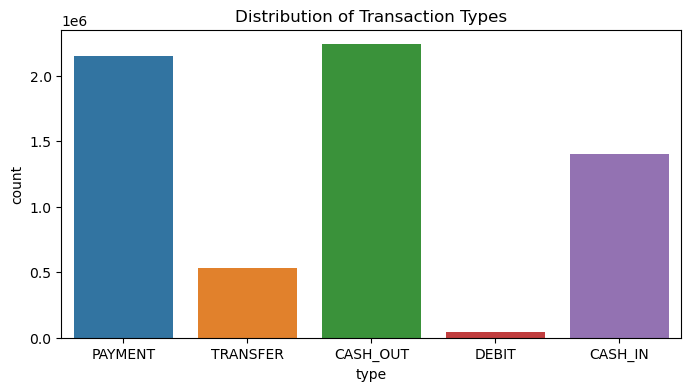

In [10]:
# Count plot for 'type' of transaction
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='type')
plt.title('Distribution of Transaction Types')
plt.show()

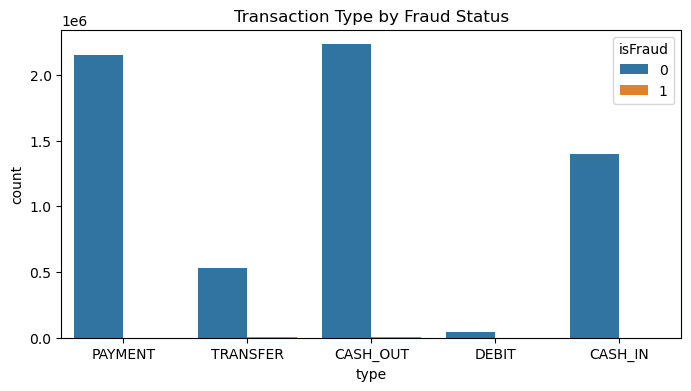

In [11]:
# Bar plot to see the relationship between 'type' and 'isFraud'
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='type', hue='isFraud')
plt.title('Transaction Type by Fraud Status')
plt.show()

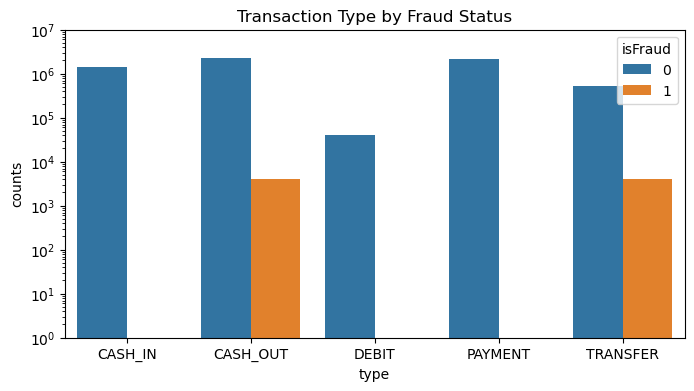

In [12]:
# Transaction Type by Fraud Status
import matplotlib.pyplot as plt
# Calculate the counts
count_data = df.groupby(['type', 'isFraud']).size().reset_index(name='counts')
# Create the plot with seaborn's barplot
plt.figure(figsize=(8, 4))
barplot = sns.barplot(data=count_data, x='type', y='counts', hue='isFraud').set_yscale('log')
# Set the title
plt.title('Transaction Type by Fraud Status')
# Set the y-axis to a log scale
#plt.yscale('log')
plt.ylim(1e0, 1e7)

plt.show()

<Axes: xlabel='amount', ylabel='Count'>

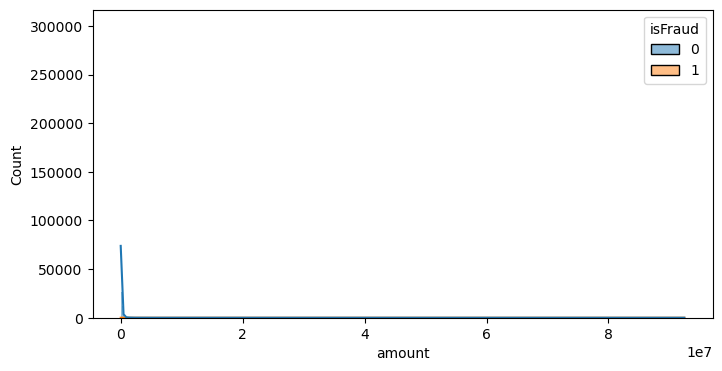

In [13]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='amount', hue = 'isFraud', kde=True)

In [14]:
df_filtered = df[(df['amount'] > -1) & (df['amount'] < 100000)]

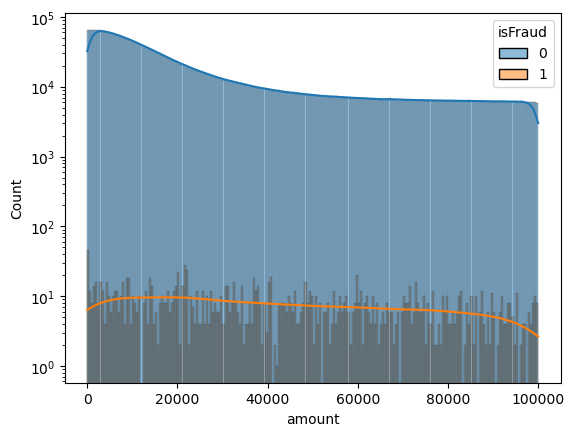

In [15]:
sns.histplot(data=df_filtered, x='amount', hue = 'isFraud', kde=True).set_yscale('log')

Plot Histograms for Numerical Features

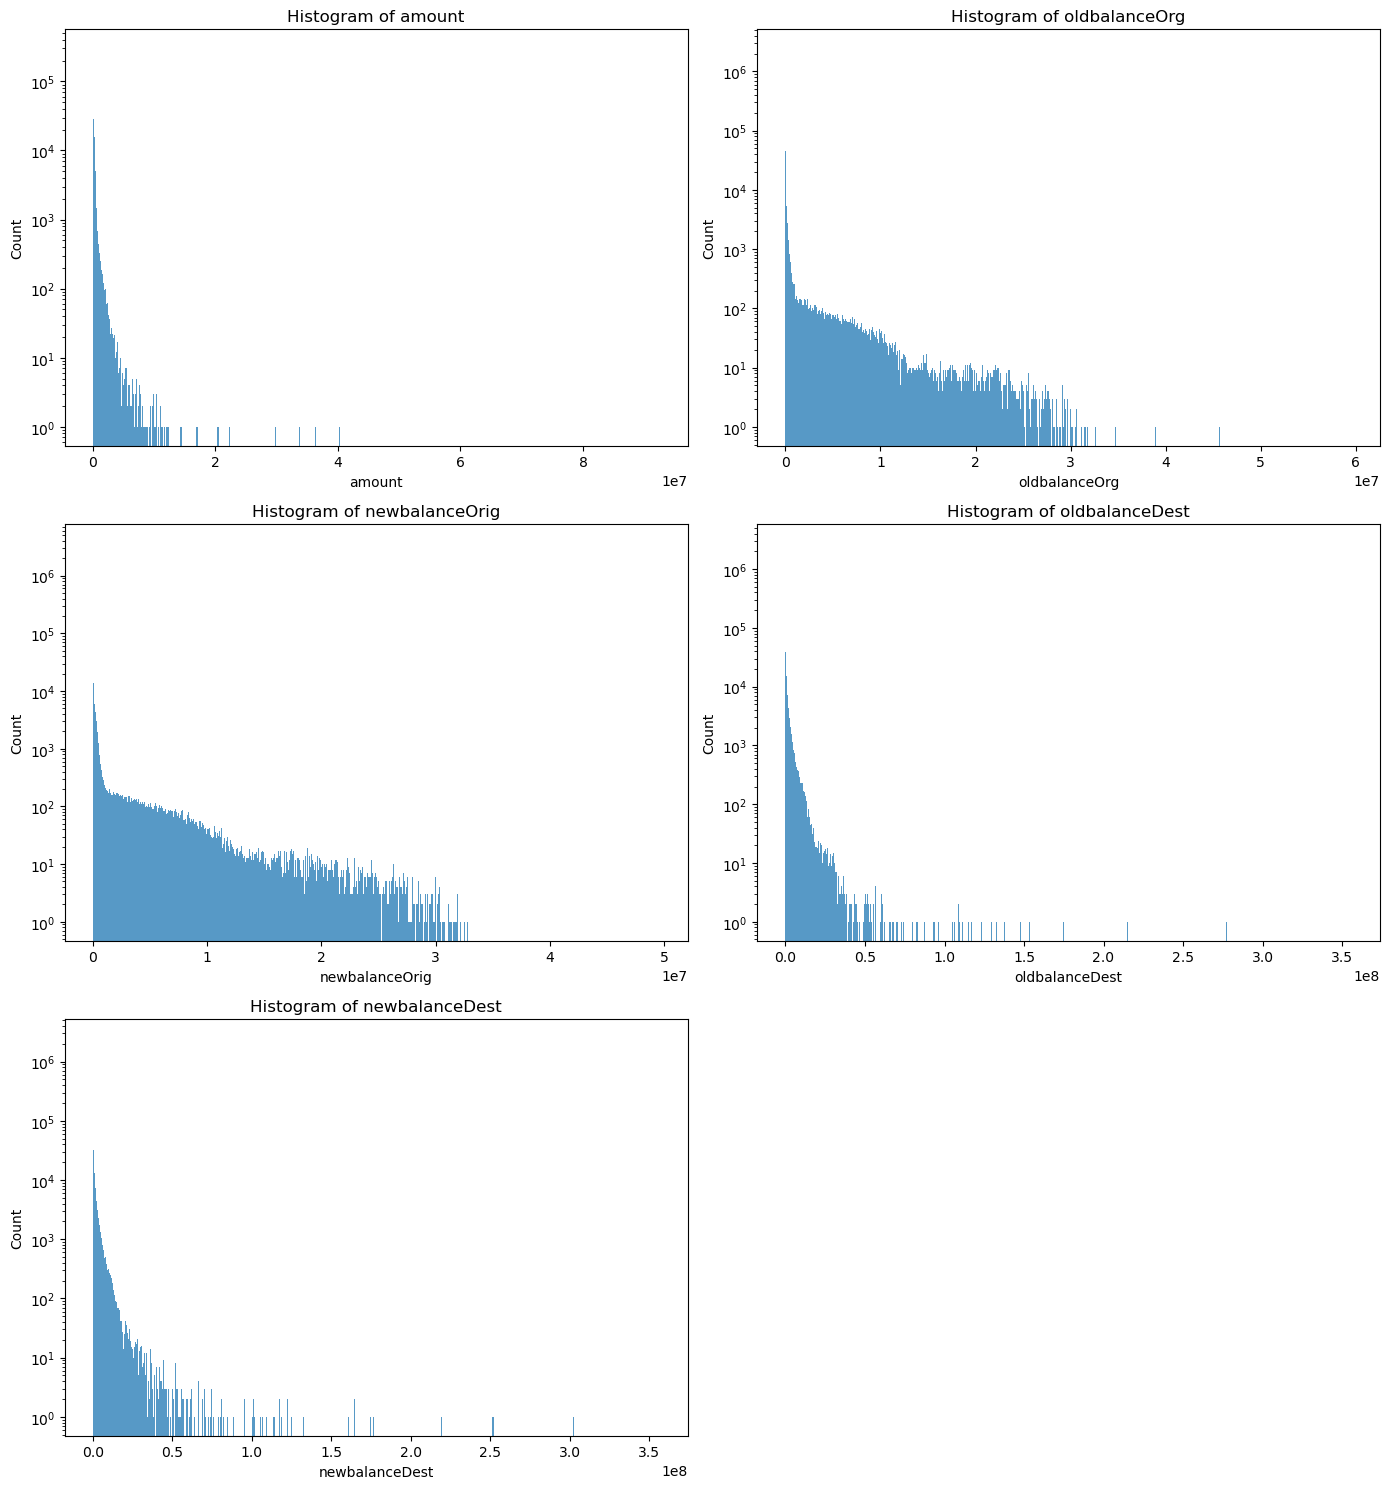

In [16]:
# List of numerical columns
num_columns = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Calculate the number of rows needed for subplots (2 plots per row)
num_rows = (len(num_columns) + 1) // 2

# Create a figure with subplots
plt.figure(figsize=(14, num_rows * 5))  # Adjust the overall figure size as needed

# Loop through the list of numerical columns to create subplots
for index, col in enumerate(num_columns):
    plt.subplot(num_rows, 2, index + 1)  # Create subplot for each column
    sns.histplot(df[col], kde=False).set_yscale('log')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()  # Adjust subplots to fit into the figure area nicely
plt.show()

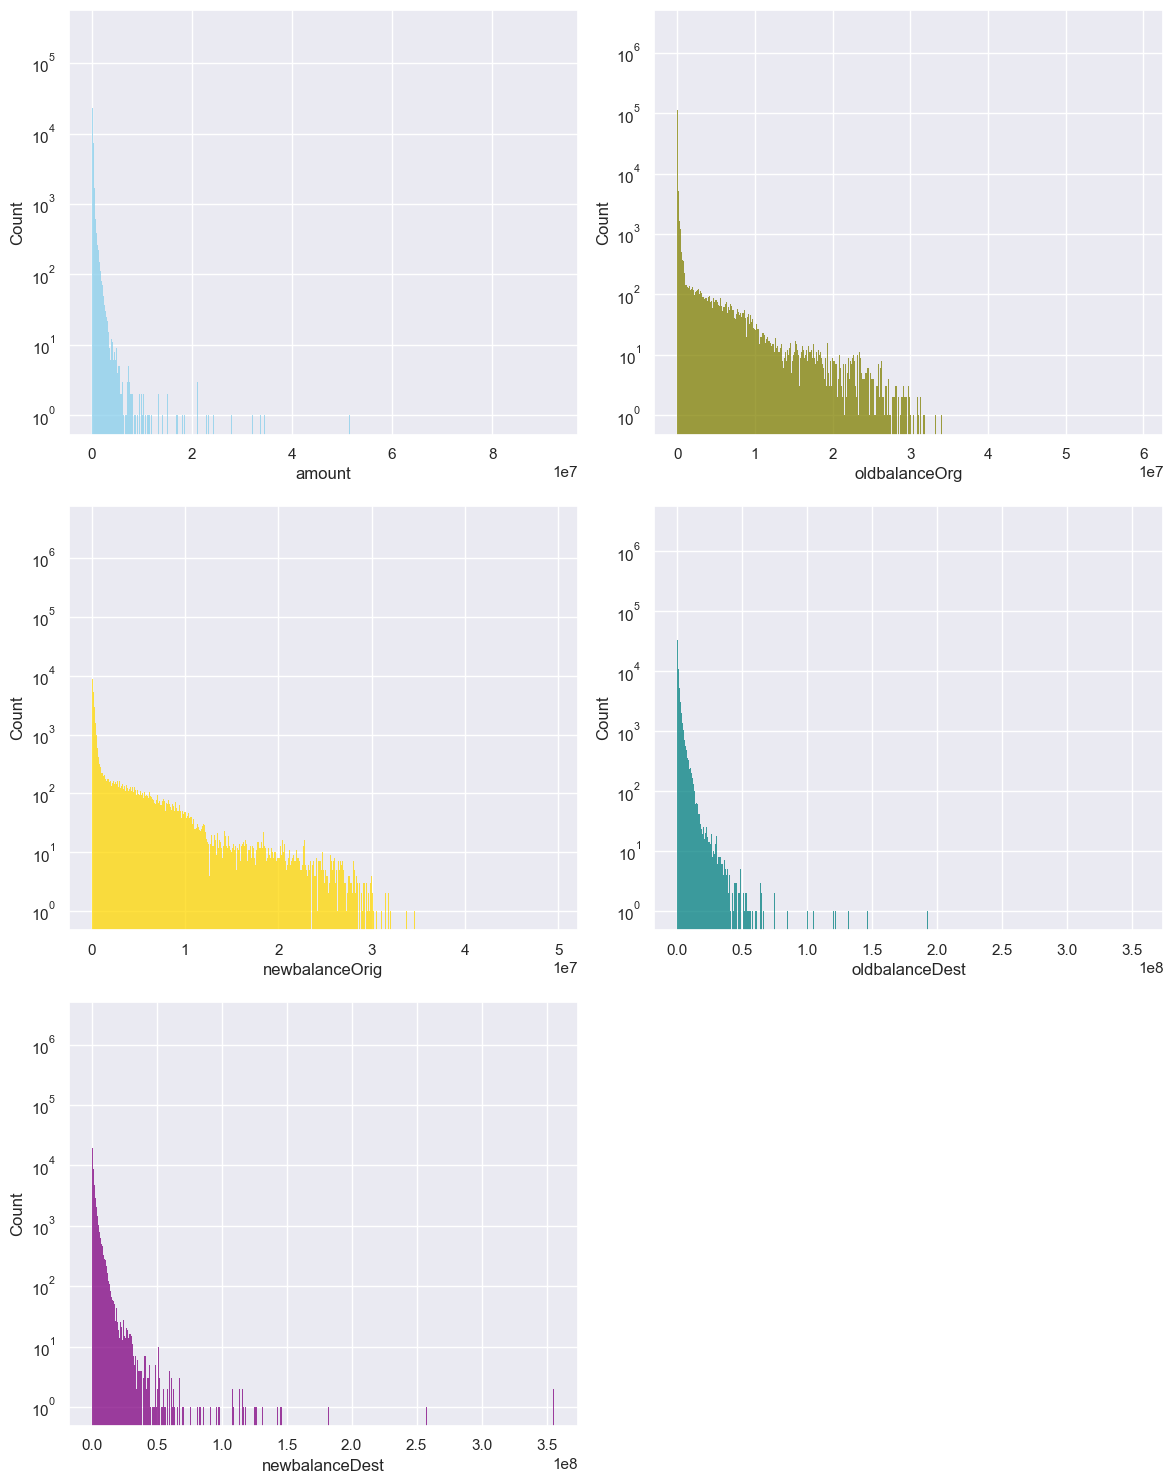

In [17]:
# num_columns = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Set the aesthetic style of the plots
sns.set_theme(style="darkgrid")

# Create a figure with subplots in a 3x2 layout
fig, axs = plt.subplots(3, 2, figsize=(12, 15))  # Increased figure size for better visibility

# Plot histograms with Kernel Density Estimate (KDE) and logarithmic y-scale
sns.histplot(df['amount'], color="skyblue", ax=axs[0, 0], log_scale=(False, True))
sns.histplot(df['oldbalanceOrg'], color="olive", ax=axs[0, 1], log_scale=(False, True))
sns.histplot(df['newbalanceOrig'], color="gold", ax=axs[1, 0], log_scale=(False, True))
sns.histplot(df['oldbalanceDest'], color="teal", ax=axs[1, 1], log_scale=(False, True))
sns.histplot(df['newbalanceDest'], color="purple", ax=axs[2, 0], log_scale=(False, True))
# Adjust layout to prevent overlap and hide empty subplot
plt.tight_layout()
axs[2, 1].axis('off')  # Turn off the unused subplot

# Display the plots
plt.show()

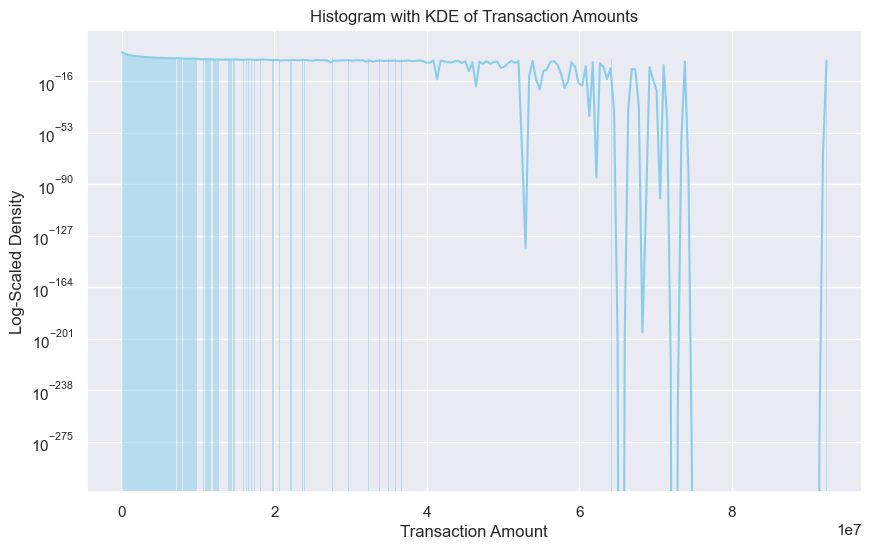

In [18]:
# Set the aesthetic style of the plots
sns.set_theme(style="darkgrid")
# Plot histograms with Kernel Density Estimate (KDE) and logarithmic y-scale
plt.figure(figsize=(10, 6))  # Adjust the size for better visibility
sns.histplot(df['amount'], color="skyblue", log_scale=(False, True), kde=True)

# Setting the title and labels for clarity
plt.title('Histogram with KDE of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Log-Scaled Density')
plt.show()

Count Plots for Categorical Features

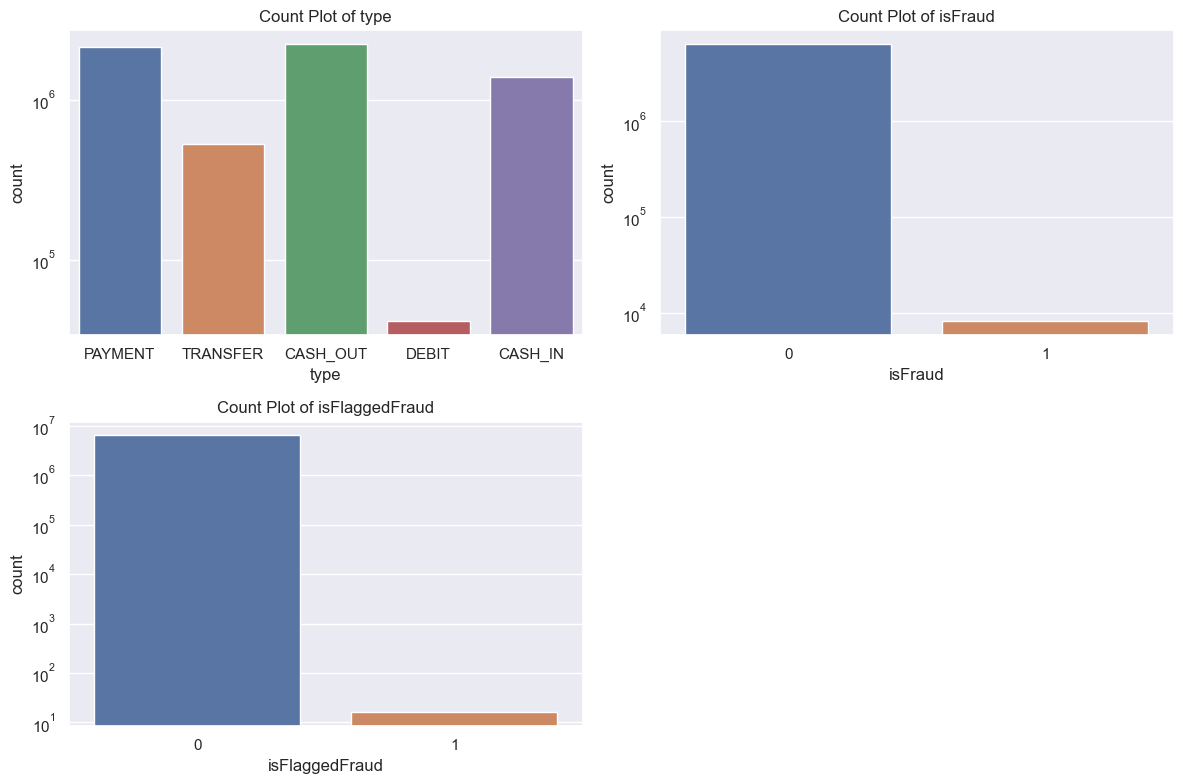

In [19]:
# List of categorical columns
cat_columns = ['type', 'isFraud', 'isFlaggedFraud']

plt.figure(figsize=(12, 8))
for i, col in enumerate(cat_columns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=df[col]).set_yscale('log')
    #plt.yscale('log')
    plt.title(f'Count Plot of {col}')
plt.tight_layout()
plt.show()

Label Encoding

In [ ]:
print(df.dtypes)

In [ ]:
# Checking for non-numeric entries
for col in df.columns:
    if df[col].dtype == 'object':
        # Attempt to convert to numeric, set errors='coerce' to handle exceptions
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Handling or investigating remaining missing values after coercion
print(df.isnull().sum())

In [ ]:
# Convert Categorical Data to Numeric using Label Encoding
label_encoder = LabelEncoder()
df['type'] = label_encoder.fit_transform(df['type'])

In [ ]:
df = pd.get_dummies(df, columns=['type'], prefix='type')

In [ ]:
df.head()

In [ ]:
df.corr()

In [ ]:
correlation_matrix = df.corr()

In [ ]:
plt.figure(figsize=(10, 8))  # Adjust the size of the figure as necessary
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

Outliers

In [ ]:
# Visualizing outliers with boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']])
plt.title('Boxplot for Monetary Variables')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Scatter plot for examining relationships and outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='oldbalanceOrg', y='amount', hue='isFraud', data=df)
plt.title('Scatter Plot of Amount vs Old Balance Org')
plt.show()

Creating velocity features based on past transactional behavior 

In [ ]:
df['step'].value_counts()

In [ ]:
sns.histplot(data=df, x='step', bins=50)

In [ ]:
df_100 = df.sample(n=100, random_state=42)
df_100

In [ ]:

# Convert 'step' to datetime and set it as the DataFrame's index
df['date'] = pd.to_datetime(df['step'].apply(lambda x: pd.Timestamp('2020-01-01') + pd.Timedelta(hours=x)))
df.set_index('date', inplace=True)

In [ ]:
df.sample(10)

In [ ]:
# Plotting some numeric column 'amount' over time
df['amount'].plot()
plt.title('Transaction Amount Over Time')
plt.ylabel('Amount')
plt.show()

Rolling average of the transaction amounts over the past 7 days

In [ ]:
#df['date'] = pd.to_datetime(df['step'].apply(lambda x: pd.Timestamp('2020-01-01') + pd.Timedelta(hours=x)))
#df.set_index('date', inplace=True)

In [ ]:
# Rolling average of the transaction amounts over the past 7 days
df['rolling_avg_7d'] = df['amount'].rolling(window='7D').mean()

In [ ]:
df['rolling_avg_1d'] = df['amount'].rolling(window='1D').mean()

In [ ]:
# Print the first few rows to see the new column with the 7-day rolling averages
print(df[['amount', 'rolling_avg_7d']].head(10))

In [ ]:
# Plot the original amounts and the rolling averages
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['rolling_avg_1d'], label='1-Day Rolling Average', color='blue')
plt.plot(df.index, df['rolling_avg_7d'], label='7-Day Rolling Average', color='red')
plt.title('7-Day Rolling Average of Transaction Amounts')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.show()

In [ ]:
# Plot the original amounts and the rolling averages
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['rolling_avg_1d'], label='1-Day Rolling Average', color='blue')
plt.plot(df.index, df['rolling_avg_7d'], label='7-Day Rolling Average', color='red')
plt.title('7-Day Rolling Average of Transaction Amounts')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.show()

Rolling count of transactions in the past 7 days

In [ ]:
df['rolling_tx_count_7d'] = df['amount'].rolling(window='7D').count()

In [ ]:
# Print the first few rows to check the new column with the 7-day rolling transaction count
print(df[['amount', 'rolling_tx_count_7d']].head(10))

In [ ]:
# Plot the rolling count of transactions
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['rolling_tx_count_7d'], label='7-Day Rolling Transaction Count', color='blue')
plt.title('Rolling Count of Transactions Over 7 Days')
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.legend()
plt.show()

Rolling sum of transaction amounts over the past 30 days

In [ ]:
# Calculate the rolling sum of transaction amounts over the past 30 days
df['rolling_sum_30d'] = df['amount'].rolling(window='30D').sum()

In [ ]:

# Print the first few rows to check the new column with the 30-day rolling sum of transaction amounts
print(df[['amount', 'rolling_sum_30d']].head(10))

In [ ]:
# Plot the rolling sum of transaction amounts
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['rolling_sum_30d'], label='30-Day Rolling Sum of Transaction Amounts', color='green')
plt.title('Rolling Sum of Transaction Amounts Over 30 Days')
plt.xlabel('Date')
plt.ylabel('Sum of Transaction Amounts')
plt.legend()
plt.show()

In [ ]:
# Track the maximum or minimum transaction amounts over a specified time period to spot sudden spikes or drops in transaction values
# Rolling maximum of the transaction amounts over the past 7 days
df['rolling_max_7d'] = df['amount'].rolling(window='7D').max()

# Rolling minimum of the transaction amounts over the past 7 days
df['rolling_min_7d'] = df['amount'].rolling(window='7D').min()

In [ ]:
# Set up the figure and axis
plt.figure(figsize=(14, 7))
plt.title('Rolling Maximum and Minimum of Transaction Amounts Over 7 Days')
plt.xlabel('Date')
plt.ylabel('Transaction Amount')

# Plot the original transaction amounts
plt.plot(df.index, df['rolling_avg_1d'], label='Average Daily Transaction Amounts', color='gray', alpha=0.5)

# Plot the rolling maximum and minimum
#plt.plot(df.index, df['rolling_max_7d'], label='7-Day Rolling Max', color='red')
plt.plot(df.index, df['rolling_min_7d'], label='7-Day Rolling Min', color='blue')

plt.legend()
plt.show()